In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [2]:
# Load dataset
labeled_data_path = "/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_Normalized_Expression_Batchcorrected_Labeled_Data_Only.csv"

gene_exp_df_labeled = pd.read_csv(labeled_data_path).iloc[: , 1:]
gene_exp_df_labeled_transposed = gene_exp_df_labeled.T




In [3]:
patient_info_df = pd.read_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/Patient_information.csv")
# print(patient_info_df.head())
surv_df = patient_info_df.loc[:, ['SurvivalTime', 'PatientID', 'StudyName']]
# print(surv_df.head())
surv_df['Surv_label'] = surv_df['SurvivalTime'].apply(lambda x: 0 if x < (365*5) else 1)
surv_df['ID_Study']=surv_df.apply(lambda row: str(row.PatientID)+';'+str(row.StudyName), axis=1)
surv_df.set_index('ID_Study', inplace=True)
surv_df.drop(columns=['SurvivalTime', 'PatientID', 'StudyName'], inplace=True)
surv_df

,Surv_label
ID_Study,
GSM107072;Pawitan,0
GSM107073;Pawitan,1
GSM107074;Pawitan,1
GSM107075;Pawitan,1
GSM107076;Pawitan,1
...,...
TCGA-E2-A108-01;TCGA,0
TCGA-BH-A0B2-01;TCGA,0
TCGA-AO-A12B-01;TCGA,1


In [4]:
gene_exp_surv_df = gene_exp_df_labeled_transposed.join(surv_df)
print(gene_exp_surv_df.head())
print(gene_exp_surv_df.shape)
gene_exp_surv_df.to_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_Normalized_Expression_Par_Surv_Labeled.csv", index=True, header=True)

                          0         1         2         3         4         5  \
GSM107073;Pawitan  5.280801  4.463688  4.169501  3.731322  4.804504  4.094147   
GSM107074;Pawitan  5.242942  3.707902  4.486855  3.508488  3.966309  4.816731   
GSM107075;Pawitan  4.587148  3.915789  4.602680  4.501715  3.728912  5.101369   
GSM107076;Pawitan  4.157379  4.222221  4.063071  4.201238  3.943046  4.353318   
GSM107077;Pawitan  4.954873  4.147906  4.252299  3.440060  4.062714  5.865733   

                          6         7         8         9  ...     11739  \
GSM107073;Pawitan  3.744131  4.023317  4.996263  4.613064  ...  3.668400   
GSM107074;Pawitan  3.452848  4.892969  4.955476  4.372226  ...  2.947763   
GSM107075;Pawitan  4.454705  5.733619  3.577702  3.491428  ...  4.340441   
GSM107076;Pawitan  4.621604  4.592652  4.295751  4.216818  ...  4.443478   
GSM107077;Pawitan  4.110289  4.207613  5.422493  4.487150  ...  3.520017   

                      11740     11741     11742     1174

In [5]:
# Start from here. 
X = gene_exp_surv_df.iloc[:, :-1].to_numpy()
print(X.shape)
y = gene_exp_surv_df.iloc[:, -1].to_numpy()
print(y.shape)

(4128, 11748)
(4128,)


In [6]:
lasso_model = Lasso(alpha=0.1)

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(lasso_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.454 (0.005)


In [8]:
from sklearn.linear_model import LogisticRegression

logistic_reg_model = LogisticRegression(
    penalty='l1',
    solver='saga',  # or 'liblinear'
    )

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(logistic_reg_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/

Mean MAE: 0.416 (0.019)


/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/

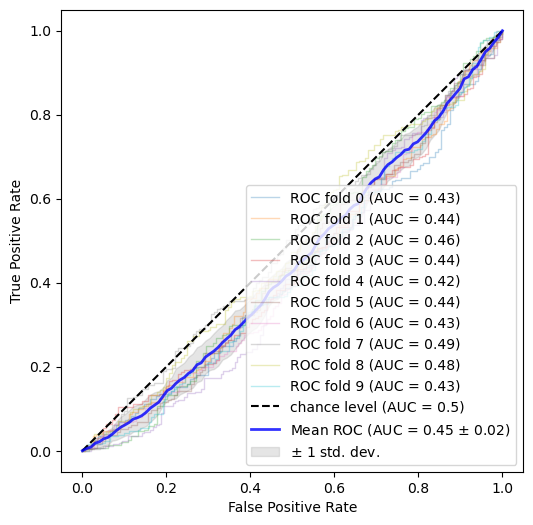

In [10]:
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=True, random_state=1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):  # From here...
    logistic_reg_model.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        logistic_reg_model,
        X[test],  # ROC calculated using the test results. 
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )                                                   # ...to here, it's doing the same as cross_val_score? Just doing it with train (fit) and test separately?
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate"
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()